<a href="https://colab.research.google.com/github/GiovanaThais/listasPython/blob/master/APS_AndrewsGiovana_processImagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resumo **



A compressão de imagens é o processo de reduzir o tamanho de um arquivo de imagem para economizar espaço de armazenamento e reduzir o tempo de transferência. Existem dois tipos principais de compressão de imagem: com perda de dados e sem perda de dados.

A compressão com perda de dados é mais comumente usada para imagens em que pequenas perdas de qualidade são aceitáveis. Essa técnica usa algoritmos para remover informações redundantes ou menos importantes da imagem, reduzindo assim o tamanho do arquivo. As imagens resultantes geralmente têm uma aparência semelhante à original, mas com alguma perda de detalhes, que pode não ser perceptível em imagens comuns, mas pode ser notada em imagens de alta qualidade ou em impressões maiores. Alguns exemplos de formatos de arquivo que usam compressão com perda de dados incluem JPEG, GIF e PNG.

Já a compressão sem perda de dados preserva completamente a qualidade original da imagem. Ela é ideal para imagens que precisam ser mantidas sem alterações, como gráficos, diagramas e imagens médicas. Esta técnica de compressão utiliza algoritmos para reduzir o tamanho do arquivo, mas sem excluir informações. A imagem resultante é idêntica à imagem original, mas com um tamanho de arquivo menor. Alguns exemplos de formatos de arquivo que usam compressão sem perda de dados incluem BMP, TIFF e RAW.

Em resumo, a compressão de imagem com perda de dados é mais eficiente na redução do tamanho do arquivo, mas a qualidade da imagem é um pouco comprometida. Por outro lado, a compressão de imagem sem perda de dados preserva totalmente a qualidade original da imagem, mas com menos eficiência na redução do tamanho do arquivo. A escolha do tipo de compressão a ser usada dependerá das necessidades específicas da aplicação.




# **APS_AndrewsMota_GiovanaThais**


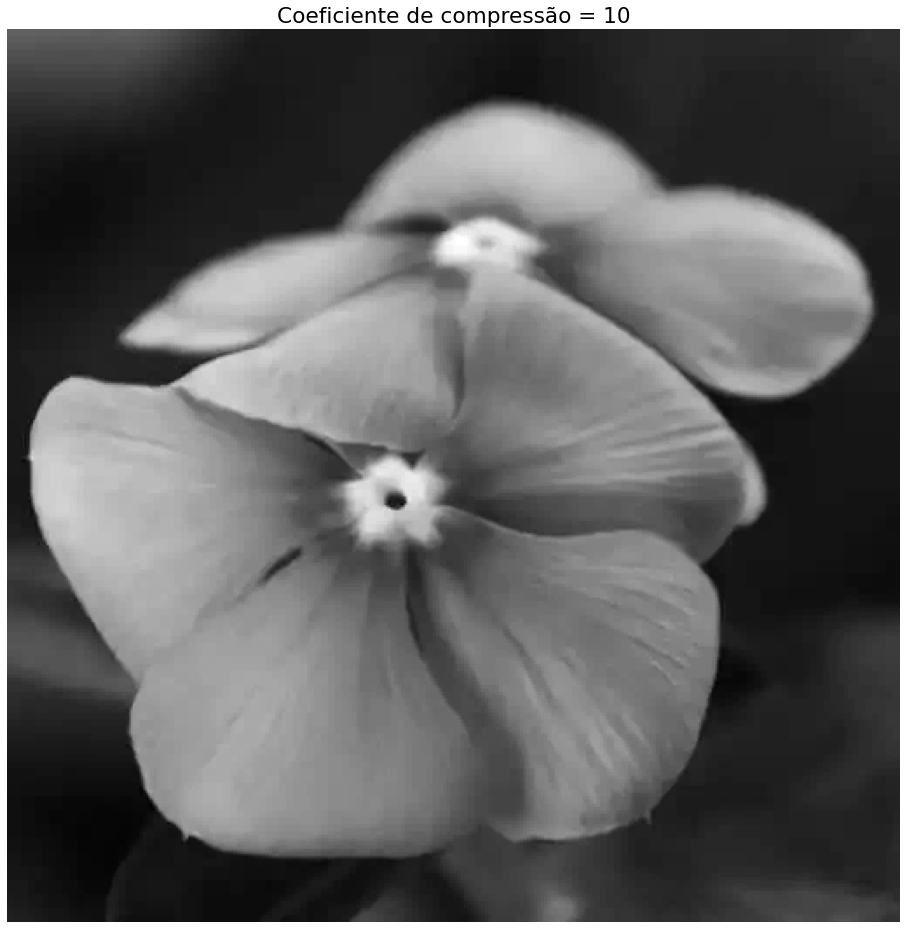

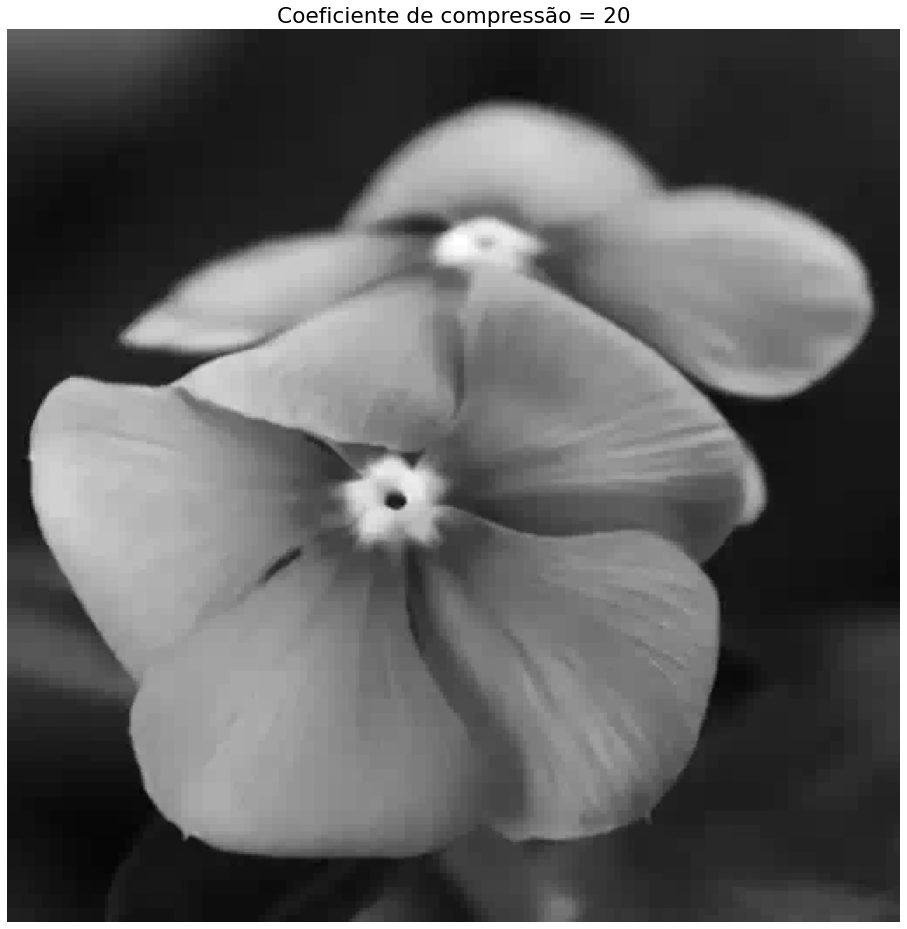

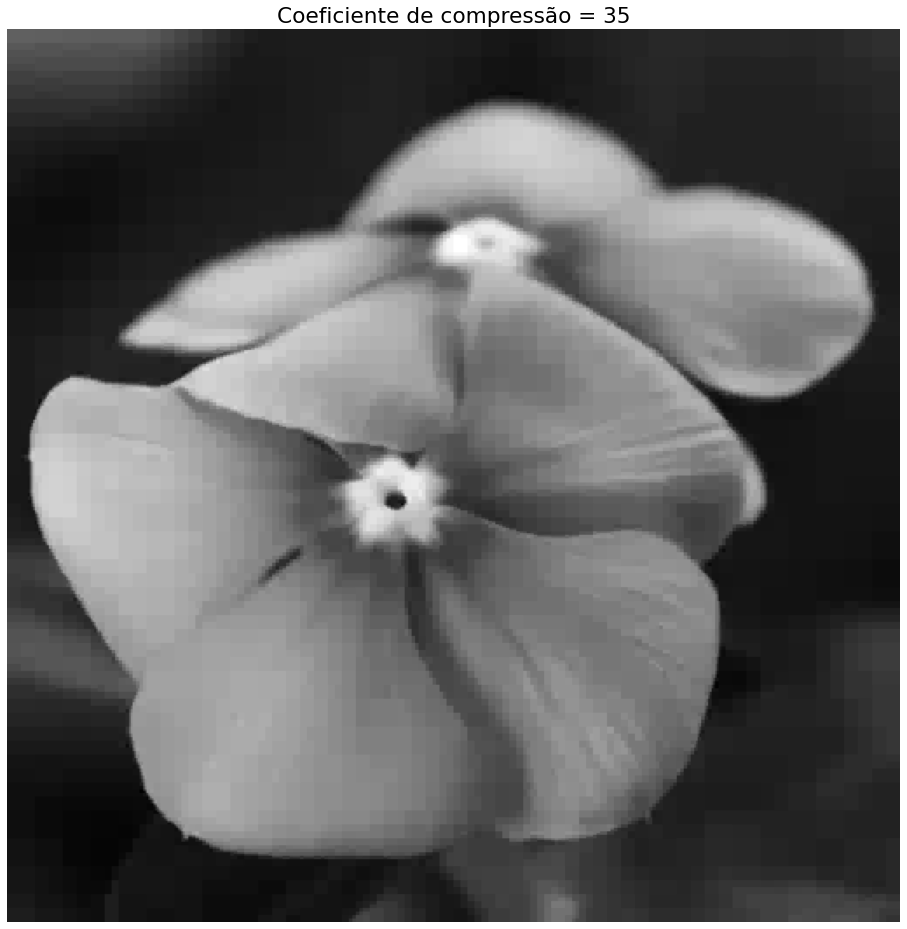

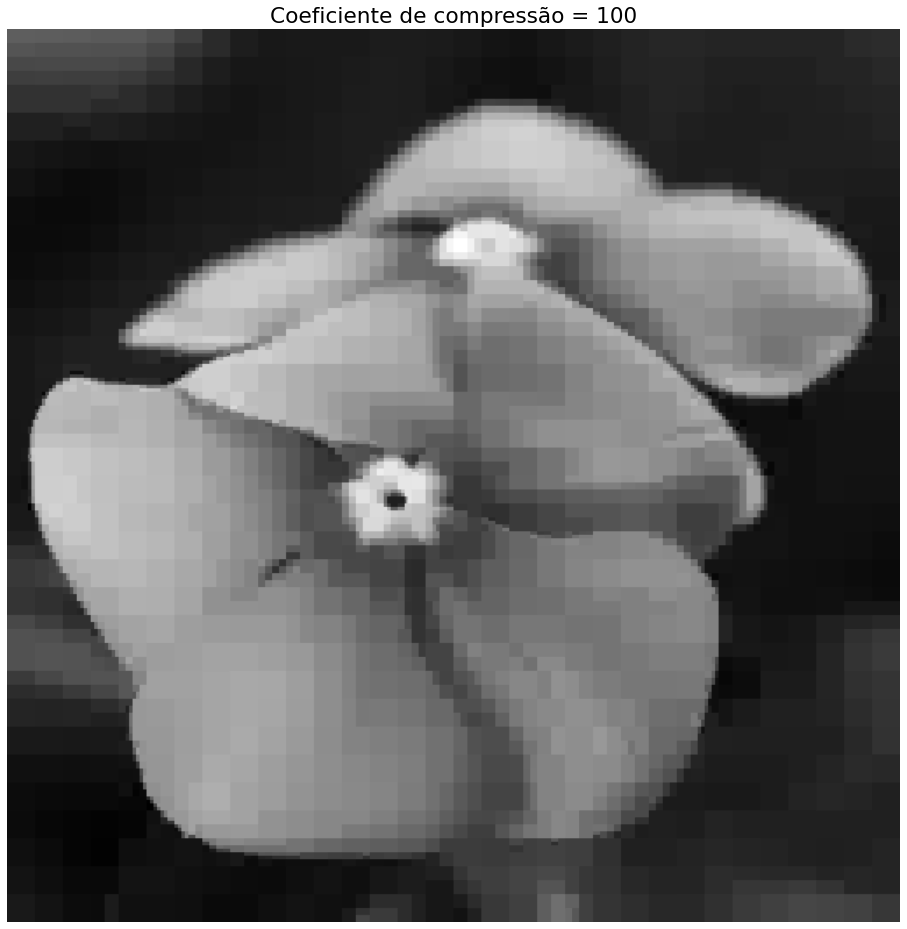

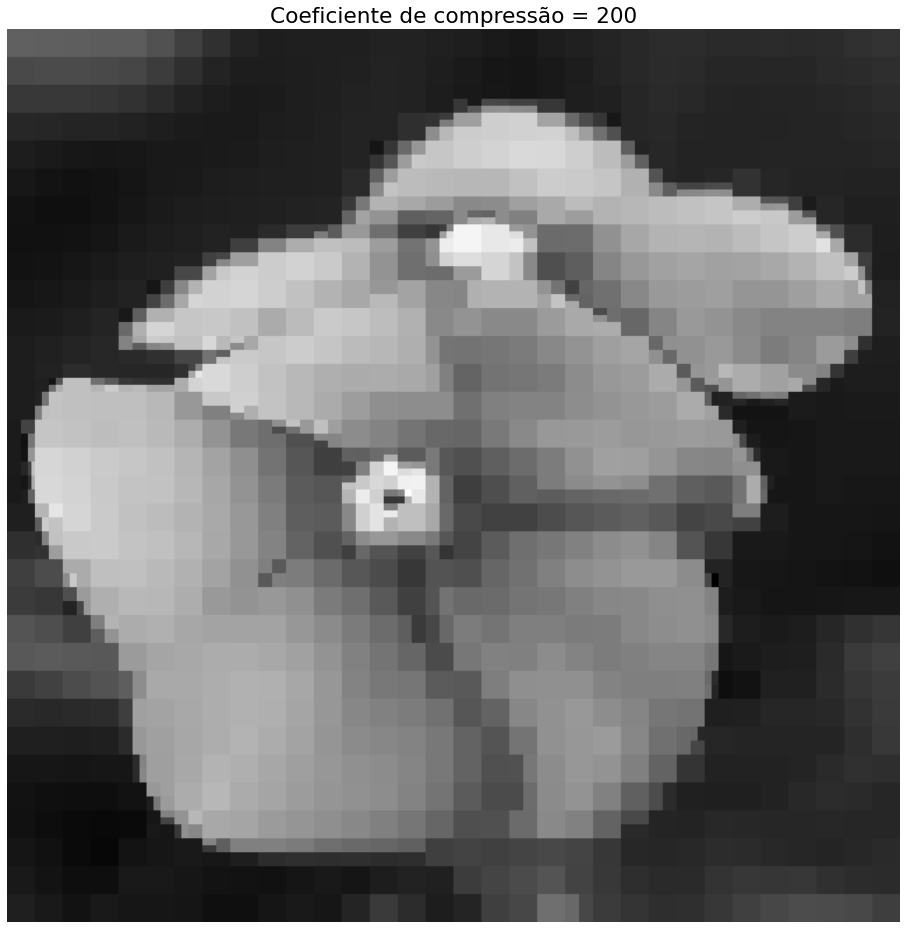

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image



plt.rcParams['figure.figsize'] = [16, 18]
plt.rcParams.update({'font.size': 18})

path_buzz = 'flor_8432.jpeg'

A = imread(path_buzz)                                    # Leitura da imagem 
B = np.mean(A, -1);                                      # Converte de RGB para escala de cinza

n = 4                                                    # Nível de compressão da wavelet
w = 'db1'                                                # Definição da wavelet mãe (neste caso Daubechies 1)
coeffs = pywt.wavedec2(B,wavelet=w,level=n)              # Cálculo dos coeficientes com a transformada wavelet

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)   # Convesão para array, apenas para manipulação matemática
    
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))           # Dar um sort no array de coeficientes com base no módulo (lembre que os coeficientes são números complexos)

for keep in (10, 20, 35, 100, 200):                      # Níveis de compressão desejada
    thresh = Csort[int(np.floor((1-1/keep)*len(Csort)))] # Definição do nível de threshold a ser aplicado
    ind = np.abs(coeff_arr) > thresh                     # Criação de uma máscara de acordo com os níveis a serem mantidos
    Cfilt = coeff_arr * ind                              # Aplicação da máscara
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plots
    Arecon = pywt.waverec2(coeffs_filt, wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('Coeficiente de compressão = ' + str(keep))

In [ ]:
import re
import numpy as np
from PIL import Image

print("Huffman Compression Program")
print("=================================================================")
h = int(input("Digite 1 se a imagem é colorida e 2 caso seja uma imagem em escala cinza: "))
if h == 1:
    file = "imagem.jpg"
    my_string = np.asarray(Image.open(file),np.uint8)
    shape = my_string.shape
    a = my_string
    print ("A string inserida é:",my_string)
    my_string = str(my_string.tolist())
elif h == 2:
    array = np.arange(0, 737280, 1, np.uint8)
    my_string = np.reshape(array, (1024, 720))
    print ("A string inserida é:",my_string)
    a = my_string
    my_string = str(my_string.tolist())

else:
    print("Você inseriu uma entrada inválida")                    # Pegando o input do usuário

letters = []
only_letters = []
for letter in my_string:
    if letter not in letters:
        frequency = my_string.count(letter)             #Frequencia de repetição de cada letra
        letters.append(frequency)
        letters.append(letter)
        only_letters.append(letter)

nodes = []
while len(letters) > 0:
    nodes.append(letters[0:2])
    letters = letters[2:]                               # organizando de acordo com a frequencia
nodes.sort()
huffman_tree = []
huffman_tree.append(nodes)                             #Fazendo cada caractere único como um nó da folha

def combine_nodes(nodes):
    pos = 0
    newnode = []
    if len(nodes) > 1:
        nodes.sort()
        nodes[pos].append("1")                       # atribuindo valores 1 e 0
        nodes[pos+1].append("0")
        combined_node1 = (nodes[pos] [0] + nodes[pos+1] [0])
        combined_node2 = (nodes[pos] [1] + nodes[pos+1] [1])  # combinando os nós para gerar caminhos
        newnode.append(combined_node1)
        newnode.append(combined_node2)
        newnodes=[]
        newnodes.append(newnode)
        newnodes = newnodes + nodes[2:]
        nodes = newnodes
        huffman_tree.append(nodes)
        combine_nodes(nodes)
    return huffman_tree                                     # huffman tree generation

newnodes = combine_nodes(nodes)

huffman_tree.sort(reverse = True)
print("Huffman tree com caminhos combinados:")

checklist = []
for level in huffman_tree:
    for node in level:
        if node not in checklist:
            checklist.append(node)
        else:
            level.remove(node)
count = 0
for level in huffman_tree:
    print("Level", count,":",level)             #print huffman tree
    count+=1
print()

letter_binary = []
if len(only_letters) == 1:
    lettercode = [only_letters[0], "0"]
    letter_binary.append(letter_code*len(my_string))
else:
    for letter in only_letters:
        code =""
        for node in checklist:
            if len (node)>2 and letter in node[1]:           #gerando binary code
                code = code + node[2]
        lettercode =[letter,code]
        letter_binary.append(lettercode)
print(letter_binary)
print("Código binário gerado:")
for letter in letter_binary:
    print(letter[0], letter[1])

bitstring =""
for character in my_string:
    for item in letter_binary:
        if character in item:
            bitstring = bitstring + item[1]
binary ="0b"+bitstring
print("Sua mensagem em binário é:")
                                        # binary code gerado

uncompressed_file_size = len(my_string)*7
compressed_file_size = len(binary)-2
print("O tamanho original do seu arquivo era", uncompressed_file_size,"bits. O tamanho de compressão é:",compressed_file_size)
print("Está salvando de ",uncompressed_file_size-compressed_file_size,"bits")
output = open("compressed.txt","w+")
print("Arquivo comprimido gerado como  compressed.txt")
output = open("compressed.txt","w+")
print("Decodificando.......")
output.write(bitstring)

bitstring = str(binary[2:])
uncompressed_string =""
code =""
for digit in bitstring:
    code = code+digit
    pos=0                                        #iterando e decodificando
    for letter in letter_binary:
        if code ==letter[1]:
            uncompressed_string=uncompressed_string+letter_binary[pos] [0]
            code=""
        pos+=1

print("Seus dados NÃO COMPACTADOS são:")
if h == 1:
    temp = re.findall(r'\d+', uncompressed_string)
    res = list(map(int, temp))
    res = np.array(res)
    res = res.astype(np.uint8)
    res = np.reshape(res, shape)
    print(res)
    print("Observe se as formas e as matrizes de entrada e saída são correspondentes ou não")
    print("Dimensões da imagem de entrada:",shape)
    print("Dimensões da imagem de saída:",res.shape)
    data = Image.fromarray(res)
    data.save('uncompressed.png')
    if a.all() == res.all():
        print("Success")
if h == 2:
    temp = re.findall(r'\d+', uncompressed_string)
    res = list(map(int, temp))
    print(res)
    res = np.array(res)
    res = res.astype(np.uint8)
    res = np.reshape(res, (1024, 720))
    print(res)
    data = Image.fromarray(res)
    data.save('uncompressed.png')
    print("Successo")

Huffman Compression Program
Digite 1 se a imagem é colorida e 2 caso seja uma imagem em escala cinza: 1
A string inserida é: [[[116 123  43]
  [116 123  43]
  [115 122  42]
  ...
  [230 239  72]
  [229 238  71]
  [228 237  70]]

 [[116 123  43]
  [116 123  43]
  [116 123  43]
  ...
  [230 238  75]
  [229 237  72]
  [228 236  71]]

 [[117 124  44]
  [117 124  44]
  [117 124  44]
  ...
  [230 237  79]
  [230 236  76]
  [229 235  75]]

 ...

 [[ 92  27  47]
  [ 92  27  47]
  [ 92  27  47]
  ...
  [164 185 116]
  [164 186 111]
  [161 184 104]]

 [[ 90  27  46]
  [ 92  27  47]
  [ 92  27  47]
  ...
  [160 182 109]
  [160 182 107]
  [157 180 100]]

 [[ 90  27  46]
  [ 90  27  46]
  [ 91  28  47]
  ...
  [150 174  80]
  [152 176  80]
  [149 173  75]]]
Huffman tree com caminhos combinados:
Level 0 : [[5236615, ',372[1]098546 ']]
Level 1 : [[2075656, ',372[', '1'], [3160959, '1]098546 ', '0']]
Level 2 : [[1359423, '1]09', '1'], [1801536, '8546 ', '0']]
Level 3 : [[993719, ',', '1'], [1081937, '